### Exploratory Data Analysis (EDA)

This notebook is dedicated to performing Exploratory Data Analysis (EDA) on the dataset to understand its key characteristics, uncover hidden patterns, and identify relationships between variables. The primary goals of this analysis are:

- Data Distribution: Understanding the distribution of individual features (e.g., histograms, box plots).
- Outlier Detection: Spotting any potential outliers or anomalies in the data.
- Feature Relationships: Analyzing correlations between numerical features and visualizing relationships between categorical and numerical variables.
- Data Patterns: Discovering patterns or trends in the dataset that could inform future modeling efforts.

By the end of this notebook, we will have:

- A deeper understanding of the dataset's structure and relationships between variables
- Visualizations that highlight key insights for further analysis or modeling
- A foundation for informed decisions in feature engineering and model selection
  
For more details on the dataset and its structure, please refer to the `README.md` file in the `../data` folder.

In [8]:
# Standard libraries
import pandas as pd
import numpy as np

# Enable auto-reload for modules during development
%load_ext autoreload
%autoreload 2

# Set display options for Pandas to show all columns
pd.set_option('display.max_columns', None)

# Load custom scripts
from scripts import visualizations as vis
from scripts import data_check as ch

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Numerical data

In [9]:
# Load dataset pre-cleaned for the database processing
path = "../data/numerical.csv"
num = pd.read_csv(path)

In [10]:
# Check the first rows of the data
num.head()

,days_for_shipping_real,days_for_shipment_scheduled,benefit_per_order,sales_per_customer,late_delivery_risk,customer_zipcode,latitude,longitude,order_date,order_item_discount,order_item_discount_rate,order_item_profit_ratio,order_item_quantity,sales,product_price,shipping_date,shipping_delay,year_order,hour_order,day_order,month_order,day_of_week_order,year_shipping,hour_shipping,day_shipping,month_shipping,day_of_week_shipping
0,2,4,88.790001,239.979996,0,28601,35.776661,-81.362625,2015-01-01 00:00:00,60.0,0.20,0.37,1,299.980011,299.980011,2015-01-03 00:00:00,-2,2015,0,1,1,4,2015,0,3,1,6
1,3,4,36.470001,107.889999,0,60625,41.832722,-87.980484,2015-01-01 00:21:00,22.1,0.17,0.34,1,129.990005,129.990005,2015-01-04 00:21:00,-1,2015,0,1,1,4,2015,0,4,1,7
2,3,4,91.180000,193.990005,0,60625,41.832722,-87.980484,2015-01-01 00:21:00,6.0,0.03,0.47,1,199.990005,199.990005,2015-01-04 00:21:00,-1,2015,0,1,1,4,2015,0,4,1,7
3,3,4,68.250000,227.500000,0,60625,41.832722,-87.980484,2015-01-01 00:21:00,22.5,0.09,0.30,5,250.000000,50.000000,2015-01-04 00:21:00,-1,2015,0,1,1,4,2015,0,4,1,7
4,5,4,4.100000,40.980000,1,78240,29.520010,-98.637413,2015-01-01 01:03:00,9.0,0.18,0.10,2,49.980000,24.990000,2015-01-06 01:03:00,1,2015,1,1,1,4,2015,1,6,1,2


In [11]:
# Correcting and checking some data types
num['order_date'] = pd.to_datetime(num['order_date'])
num['shipping_date'] = pd.to_datetime(num['shipping_date'])
ch.check(num)

Number of columns: 27 and rows: 180516

Data types:
days_for_shipping_real                  int64
days_for_shipment_scheduled             int64
benefit_per_order                     float64
sales_per_customer                    float64
late_delivery_risk                      int64
customer_zipcode                        int64
latitude                              float64
longitude                             float64
order_date                     datetime64[ns]
order_item_discount                   float64
order_item_discount_rate              float64
order_item_profit_ratio               float64
order_item_quantity                     int64
sales                                 float64
product_price                         float64
shipping_date                  datetime64[ns]
shipping_delay                          int64
year_order                              int64
hour_order                              int64
day_order                               int64
month_order                 

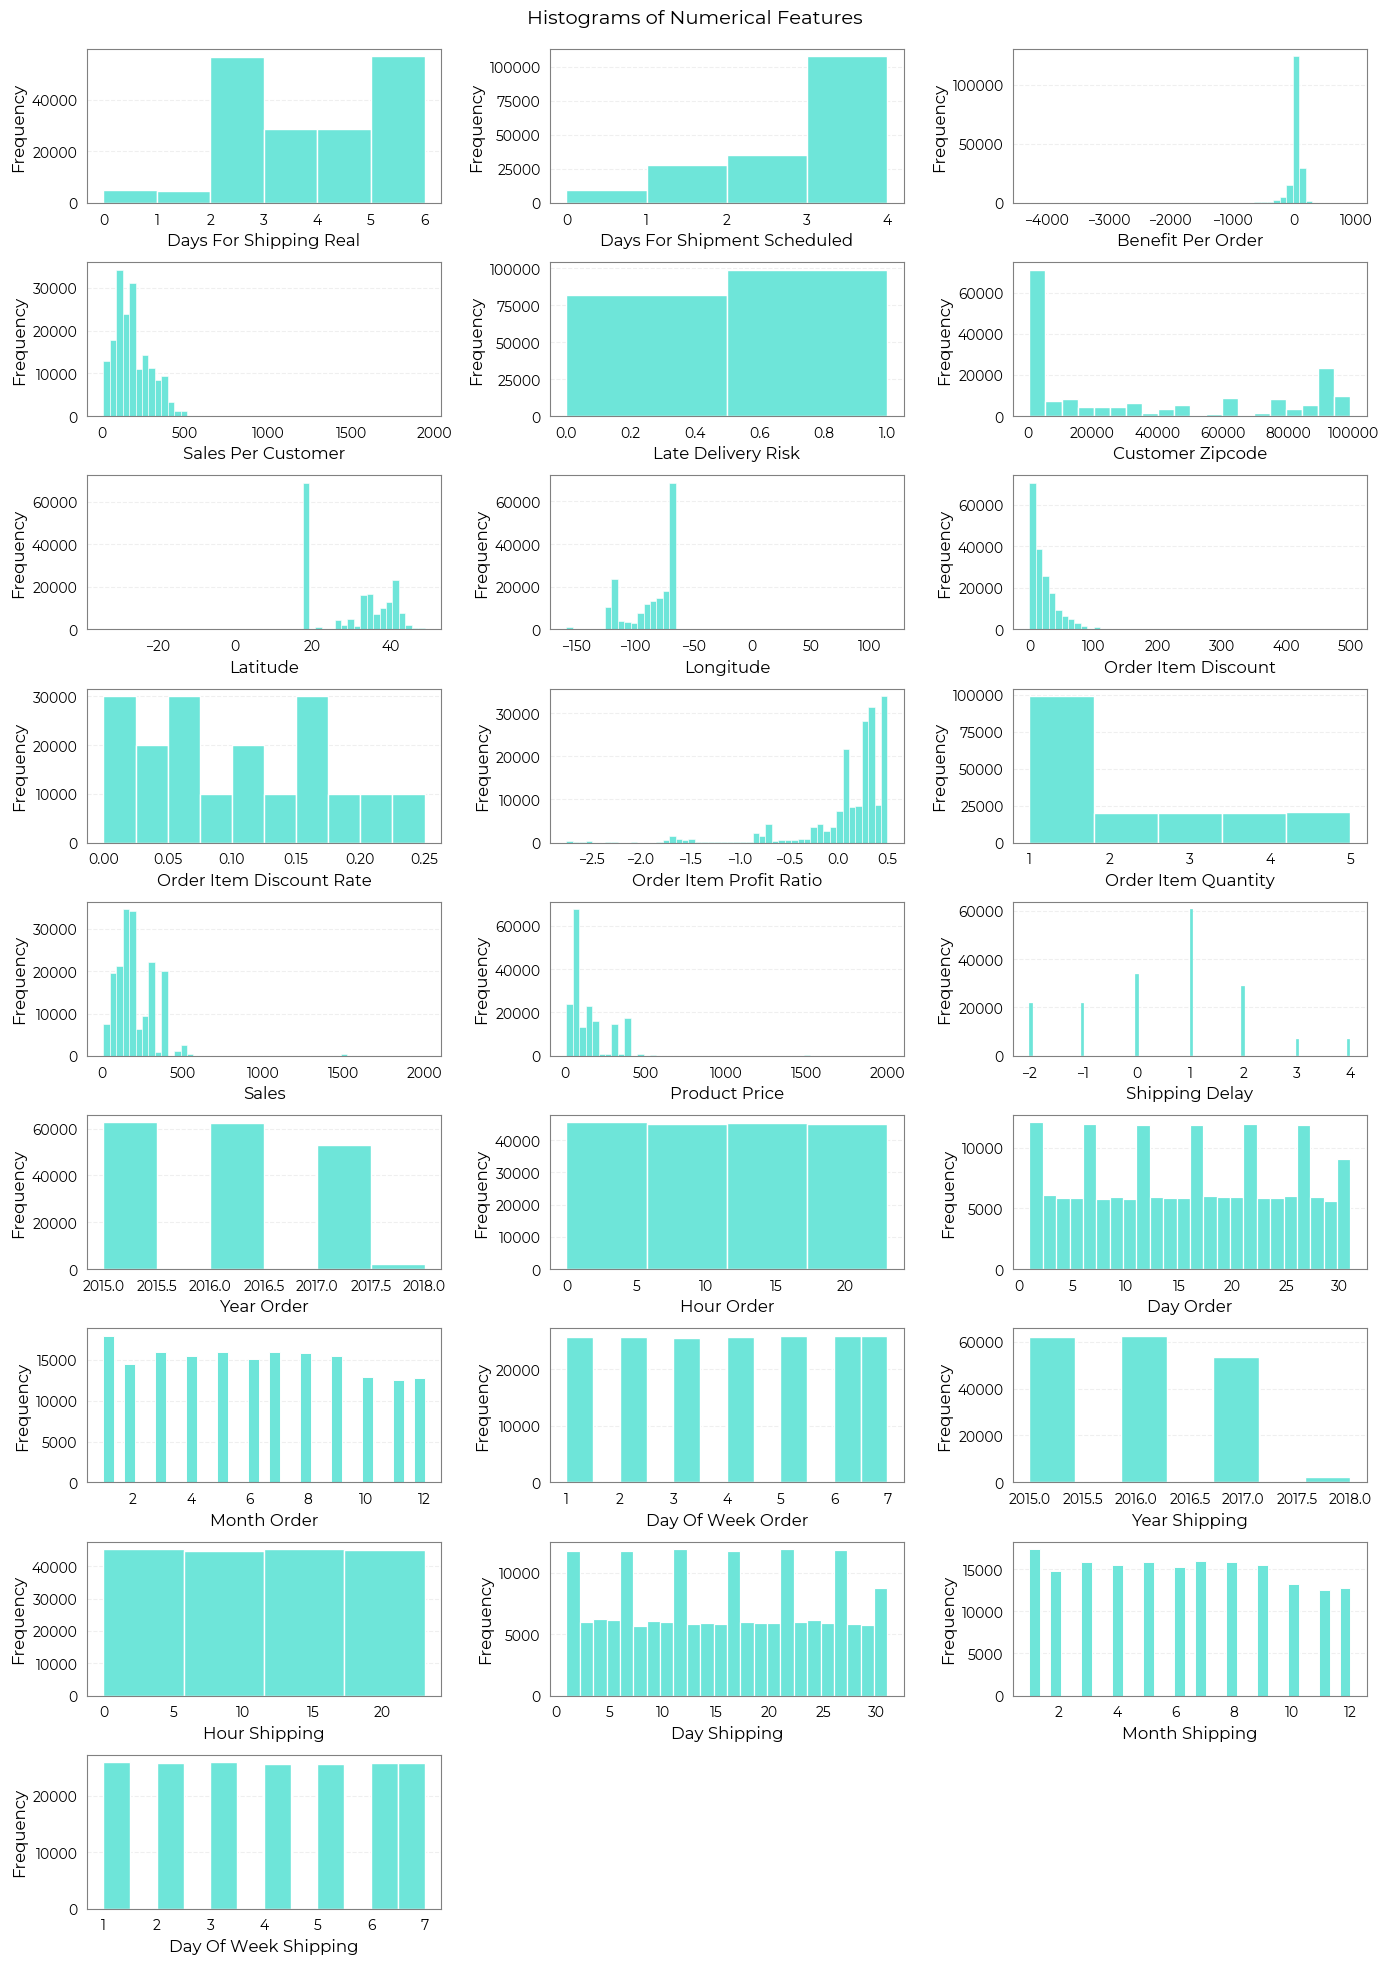

In [12]:
# Histograms of Numerical Features
vis.plot_histograms(num)

### What did we observe and/or learn from the histograms:

- `late_deliver_risk` is a categorical column and will be the target column in the categorical ML models
- None of the distribution follows a normal distribution.
- `benefit_per_order` and `profit_ratio` have a range from positive to negative vales and is left skewed with negative outliers, showing orders where there is not benefit for the company but losses and in some cases this losses are high in values. 
- `sales_per_customer`, `order_item_discount`, `sales` and `product_price` distributions are right skewed with some outliers. 
- This skews distributions might benefit from some normalization/standardization 
- `day_of_week_order` and `day_of_week_shipping` follow an uniform distribution so further analysis for late risk and not late risk need to be perform. The same for day of month and hour

The percentage of late delivery risk is 54.83 % and the percentage of non-risk is 45.17 %


,Absolute frequency,Relative frequency
Risk,98976,54.83
Non-Risk,81540,45.17
Total,180516,100.00


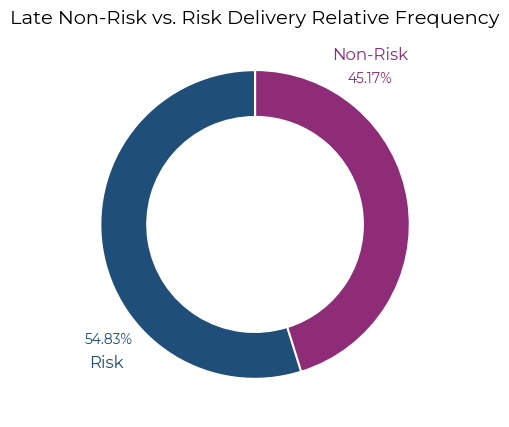

In [13]:
# What percentage of orders in the dataset are set as risky?
frequency_table, frequency_table_total = vis.calculate_late_percentage(num)
print(f'The percentage of late delivery risk is {frequency_table["Relative frequency"].iloc[0]} % '
      f'and the percentage of non-risk is {frequency_table["Relative frequency"].iloc[1].round(2)} %')
frequency_table_total

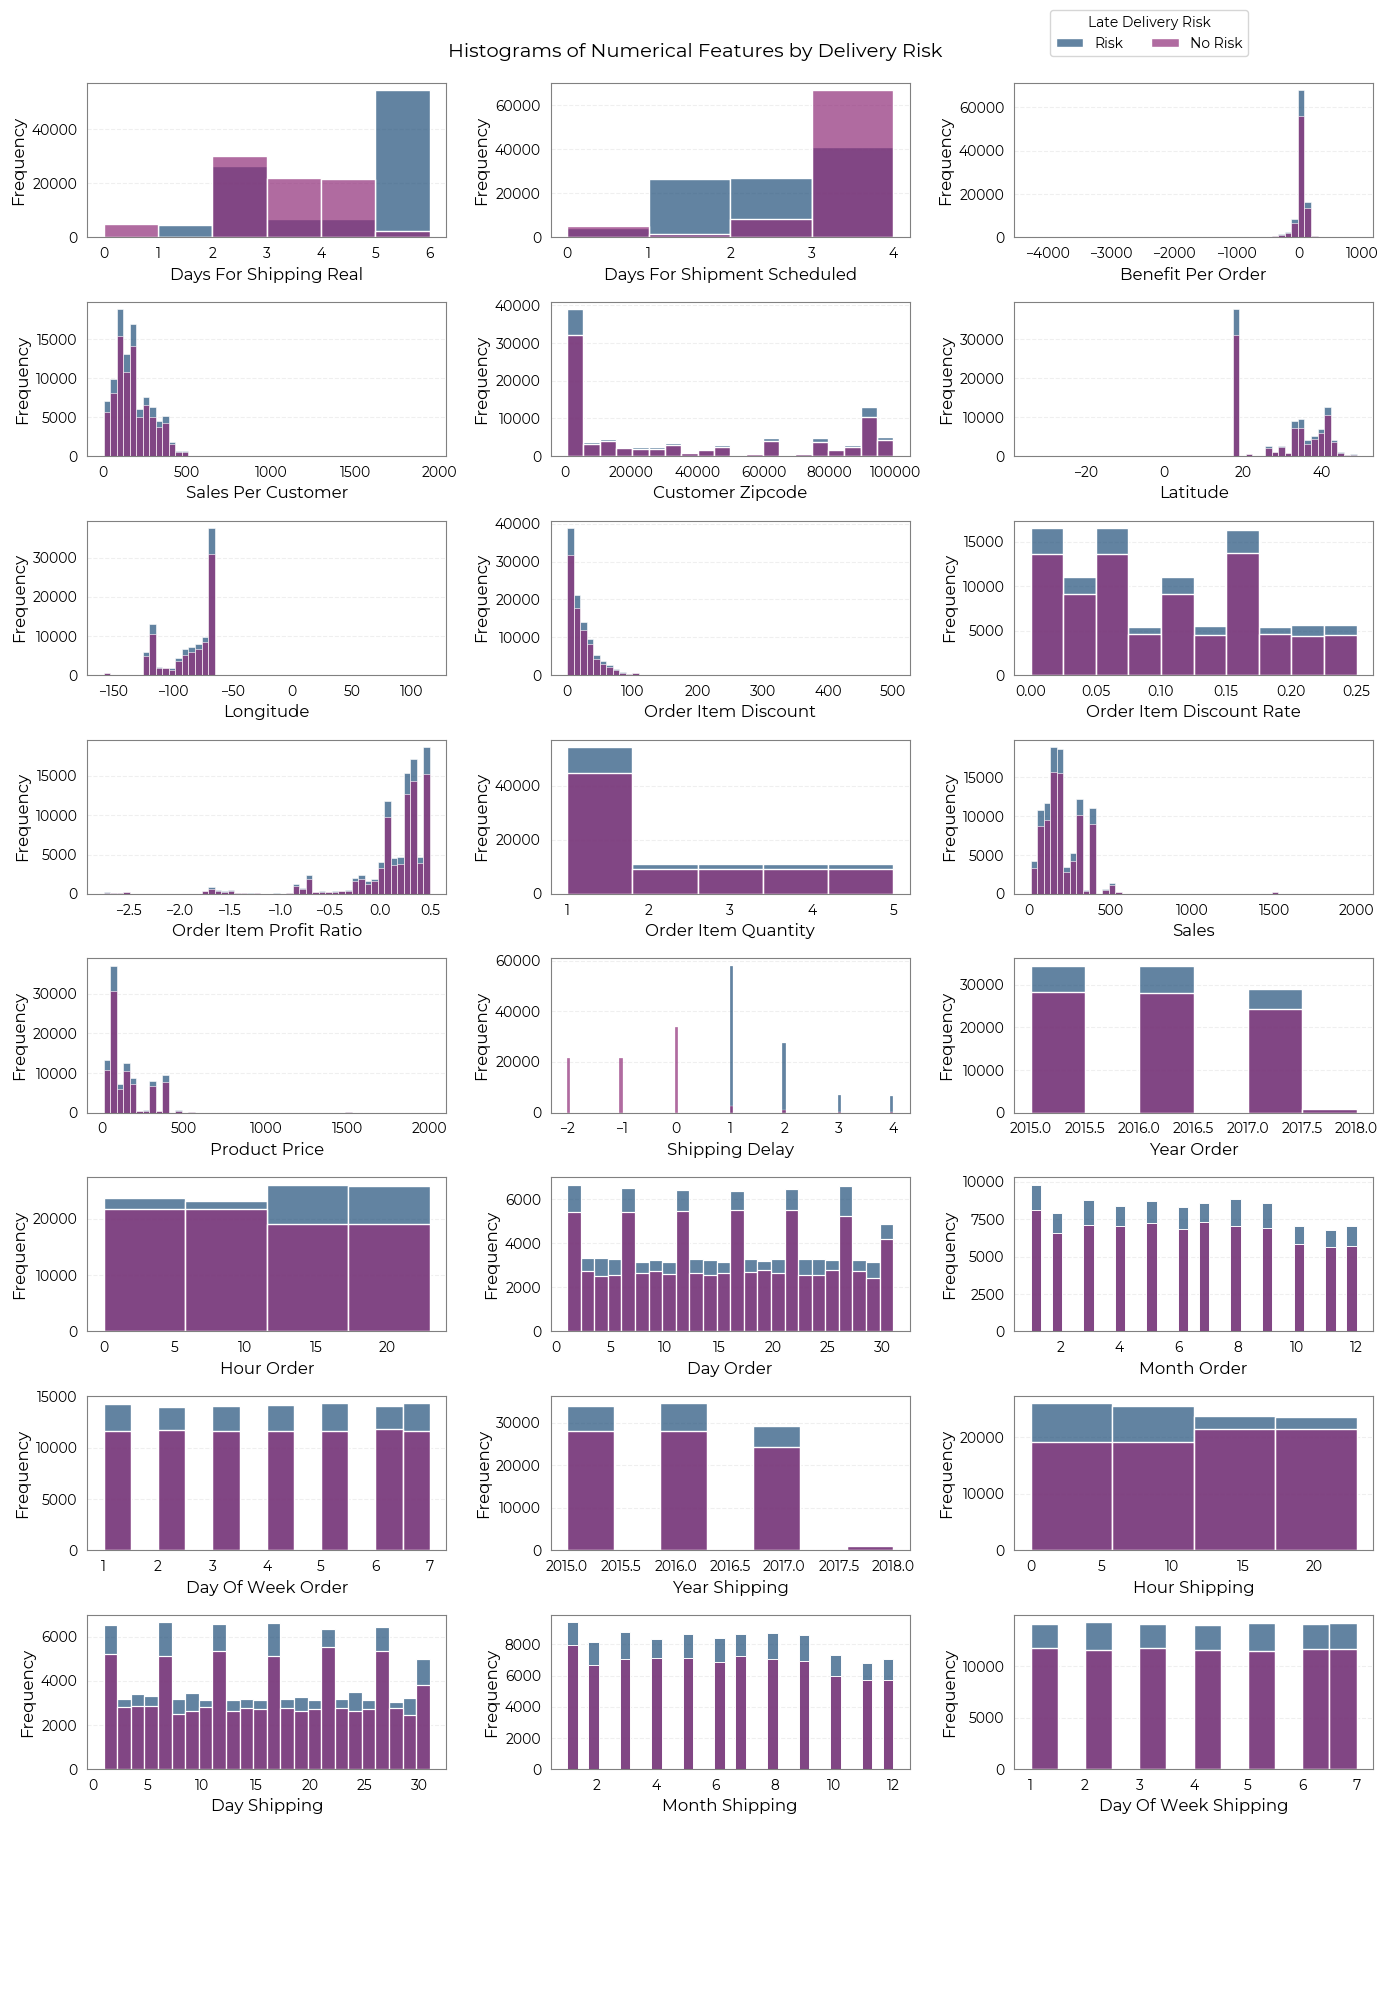

In [14]:
# Lets see how this distribution behave for order with late delivery risk and order with on time delivery risk
vis.plot_histograms_delivery_risk_split(num)

### What did we observe and/or learn from the histograms splits by late risk:

- There are not clear patterns in the numerical data between orders with and without late risks. The only clear insights is that the number of orders without a delivery risk increase with the number of schedules days for shipping
- Additionally orders shipped 5 days after the order day have a higher frequency of delivery risk. 

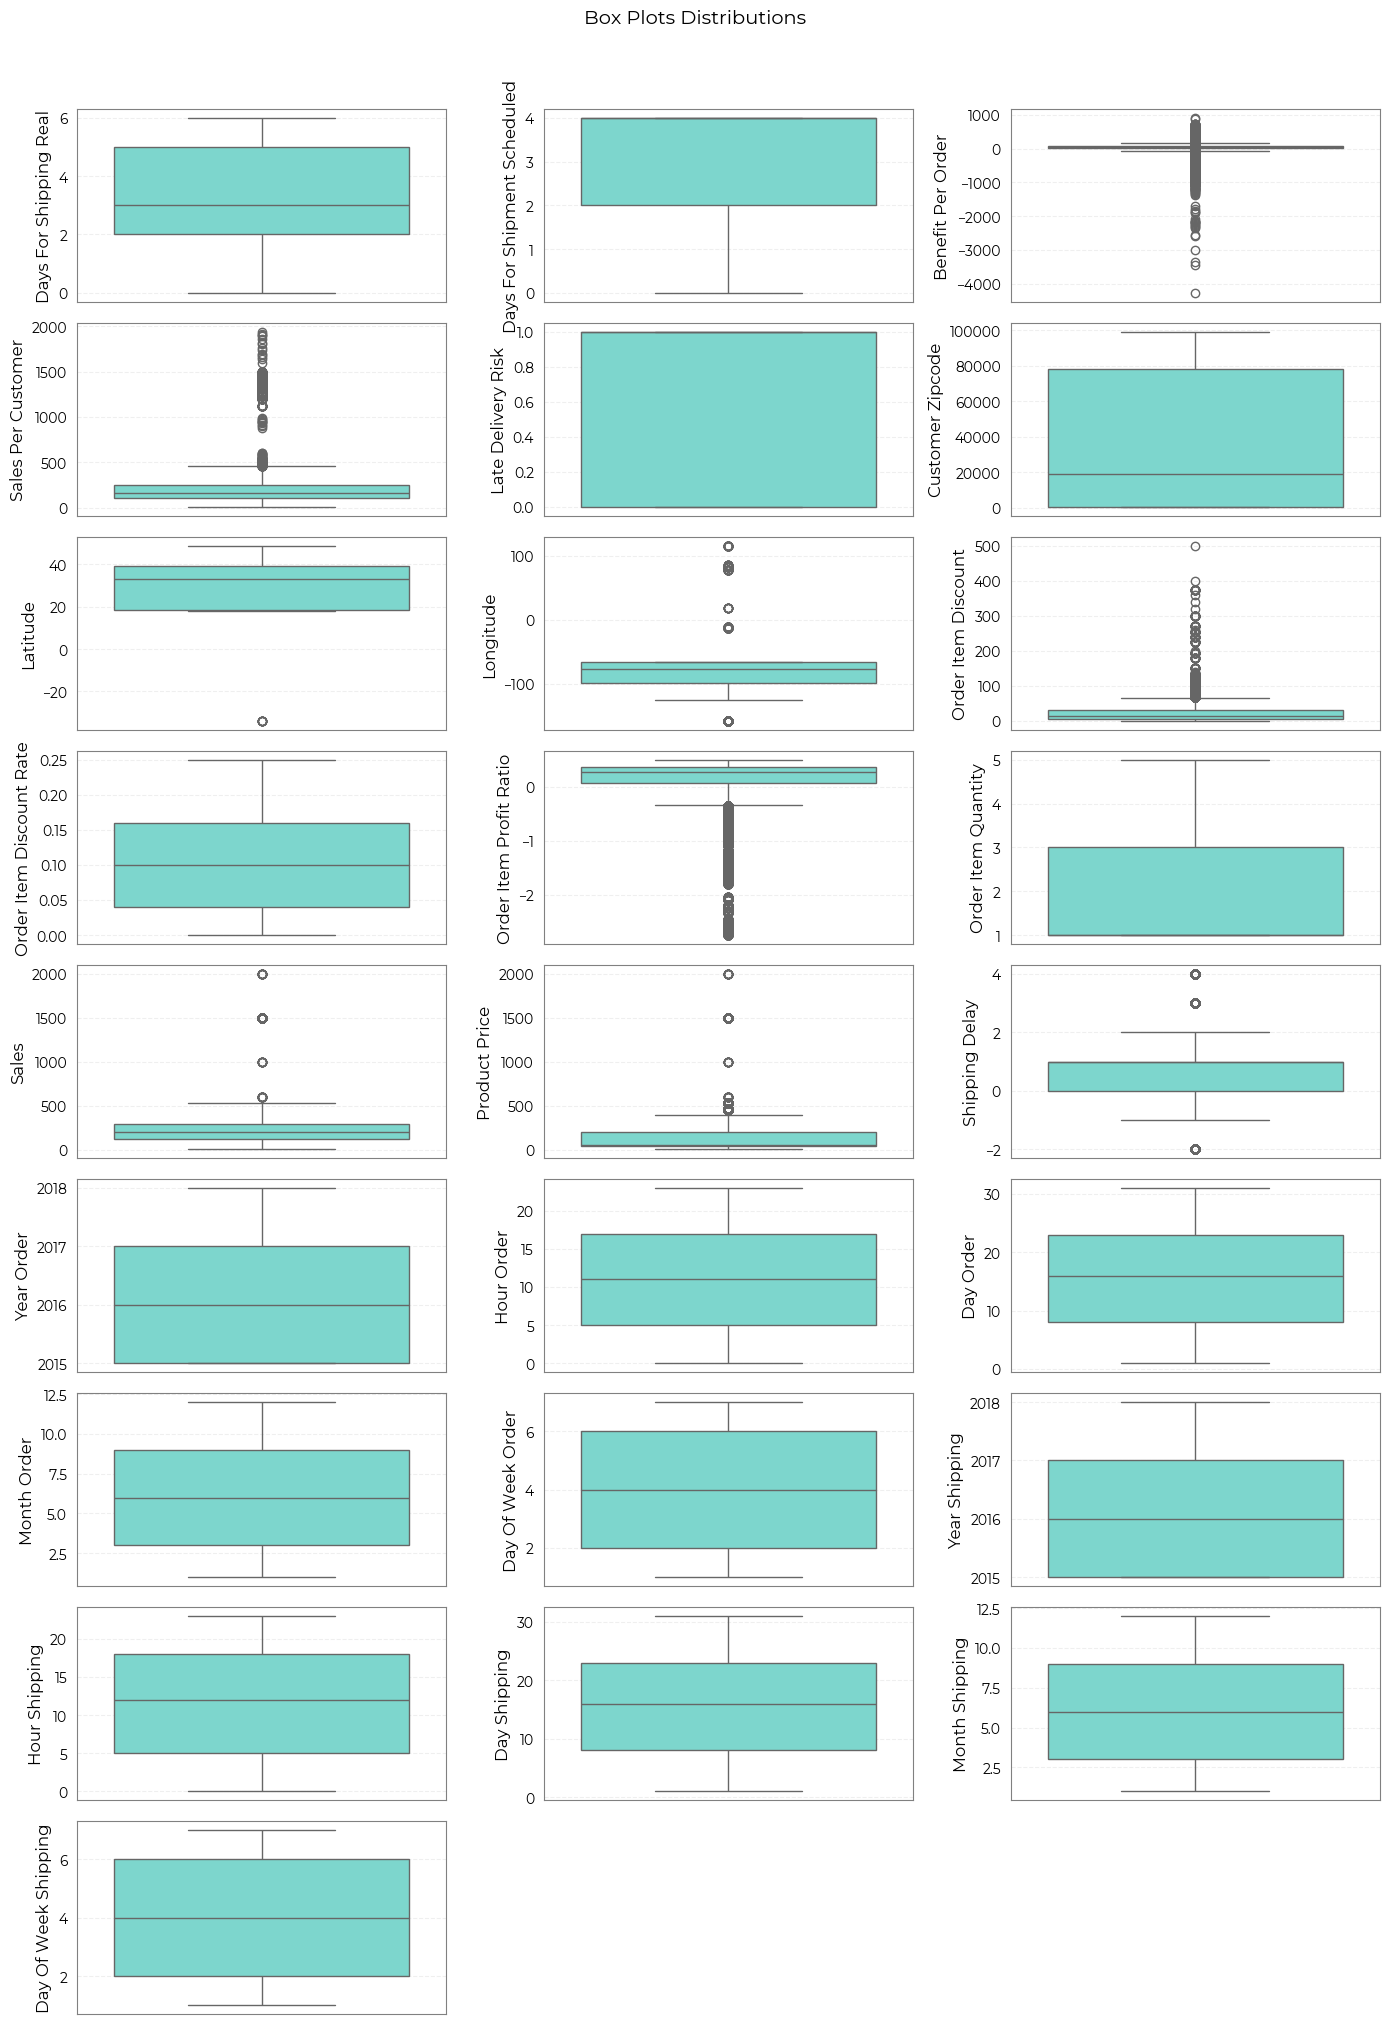

In [15]:
# Box Plots of Numerical Features
vis.plot_box_plot(num)

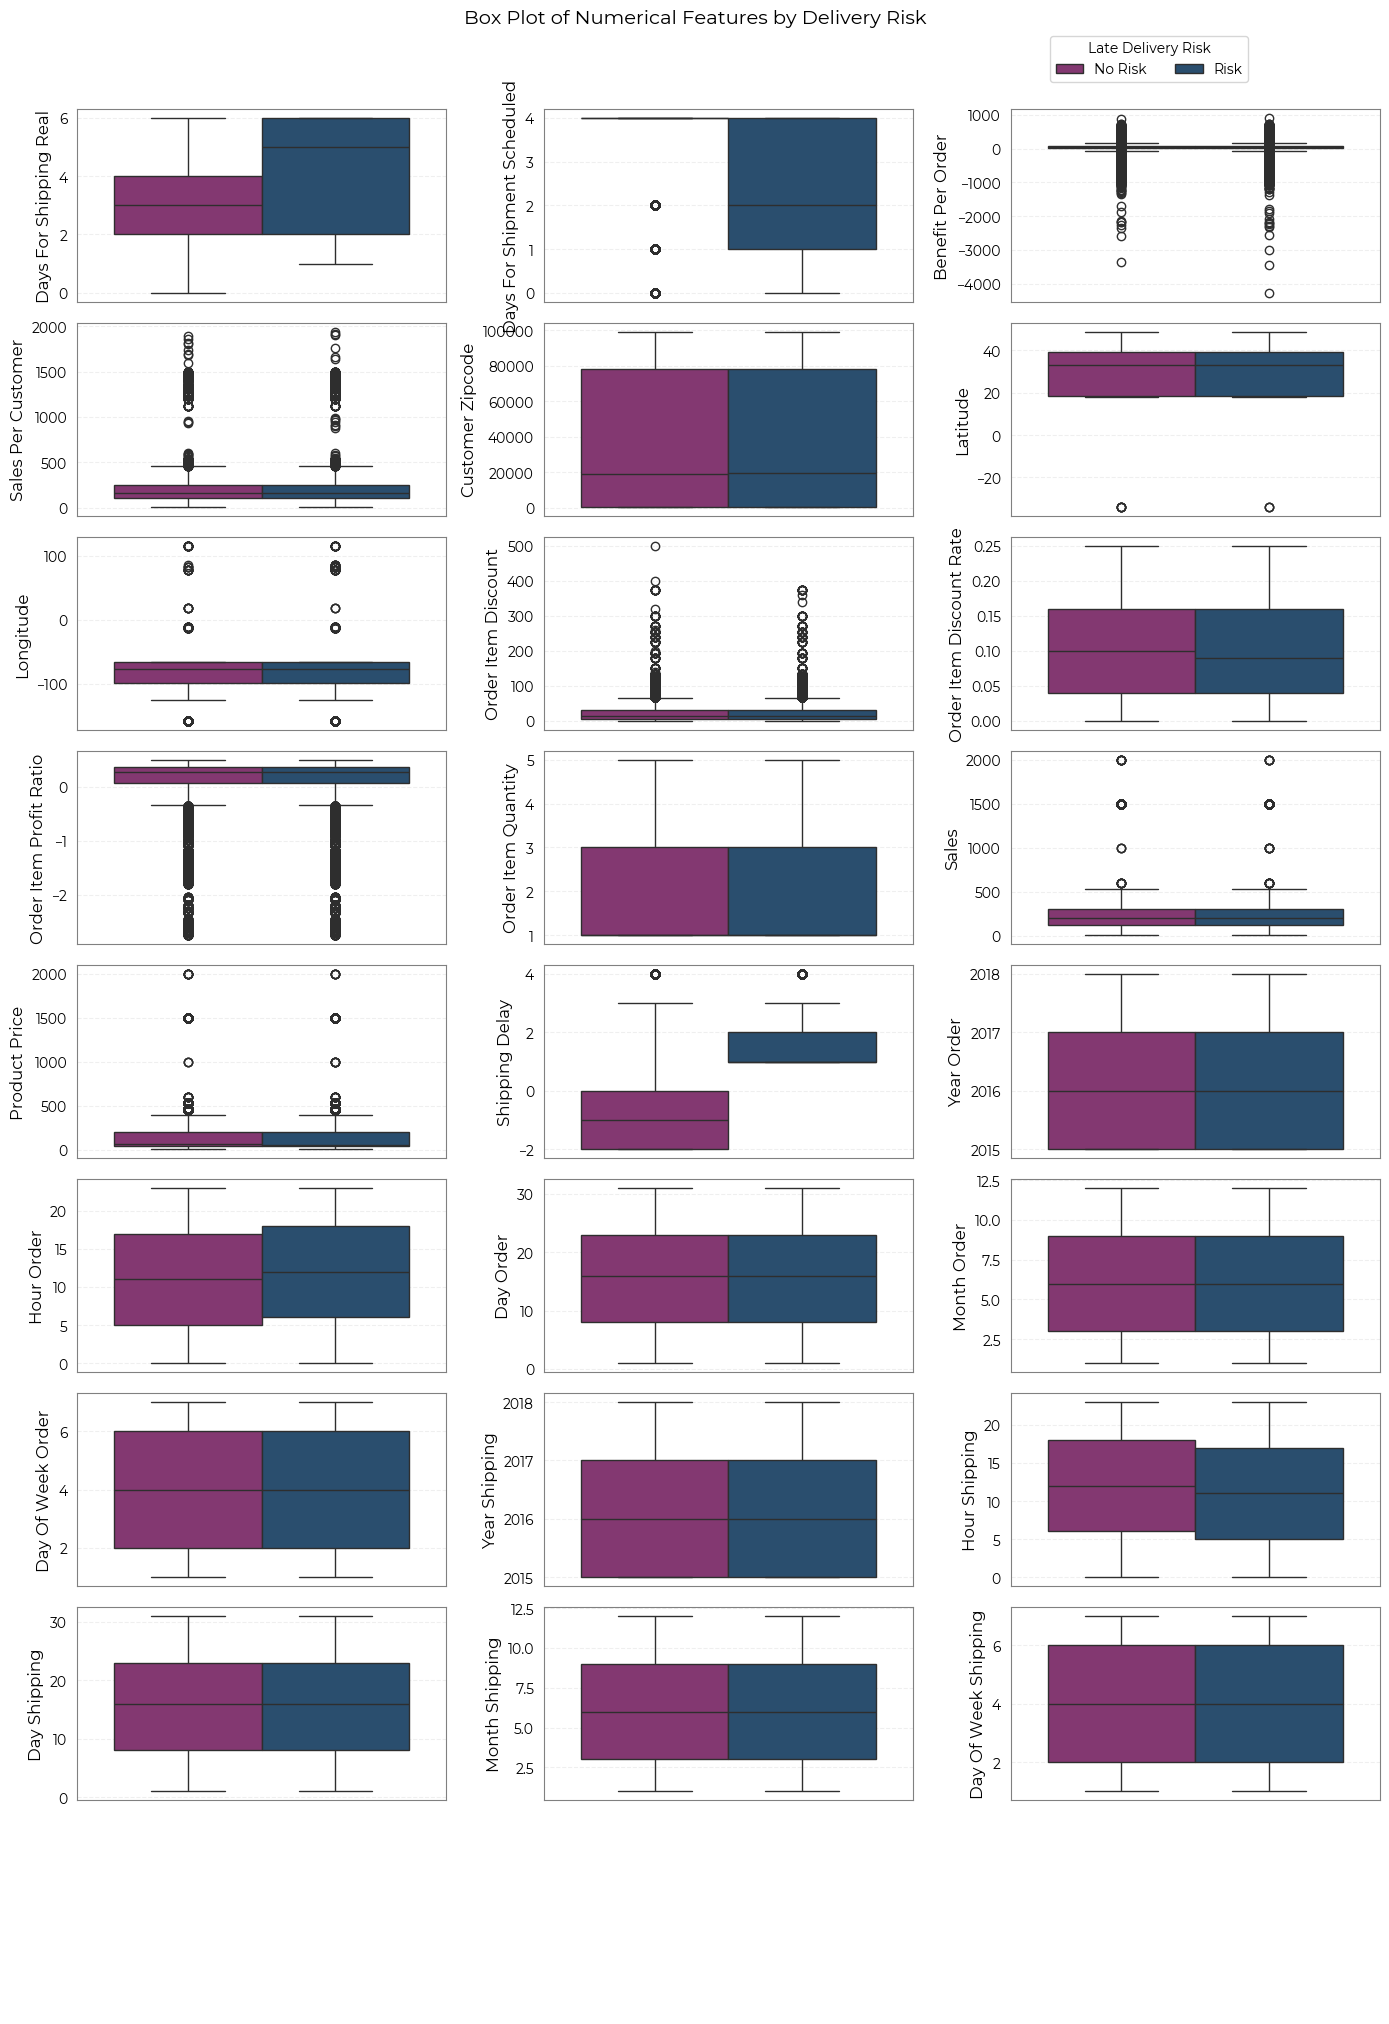

In [16]:
# Lets see how this distribution behave for order with late delivery risk and order with on time delivery risk
vis.plot_side_by_side_box_plots(num)

### What did we observe and/or learn from the box plots:

- The plots confirm the presence of outliers, mainly in `benefit_per_order`, `profit_ratio`, `sales_per_customer` and `order_item_discount`.
- There is not clear trend in the features between late and no-late delivery risk

late_delivery_risk             1.00000
shipping_delay                 0.77765
days_for_shipping_real         0.40143
hour_order                     0.04704
month_shipping                 0.00370
customer_zipcode               0.00315
month_order                    0.00260
day_of_week_order              0.00113
day_of_week_shipping           0.00072
latitude                       0.00068
order_item_discount_rate       0.00039
order_item_quantity           -0.00014
day_shipping                  -0.00037
year_shipping                 -0.00044
order_item_discount           -0.00076
longitude                     -0.00193
day_order                     -0.00202
year_order                    -0.00217
product_price                 -0.00217
order_item_profit_ratio       -0.00231
sales                         -0.00357
benefit_per_order             -0.00373
sales_per_customer            -0.00379
hour_shipping                 -0.04340
days_for_shipment_scheduled   -0.36934
dtype: float64

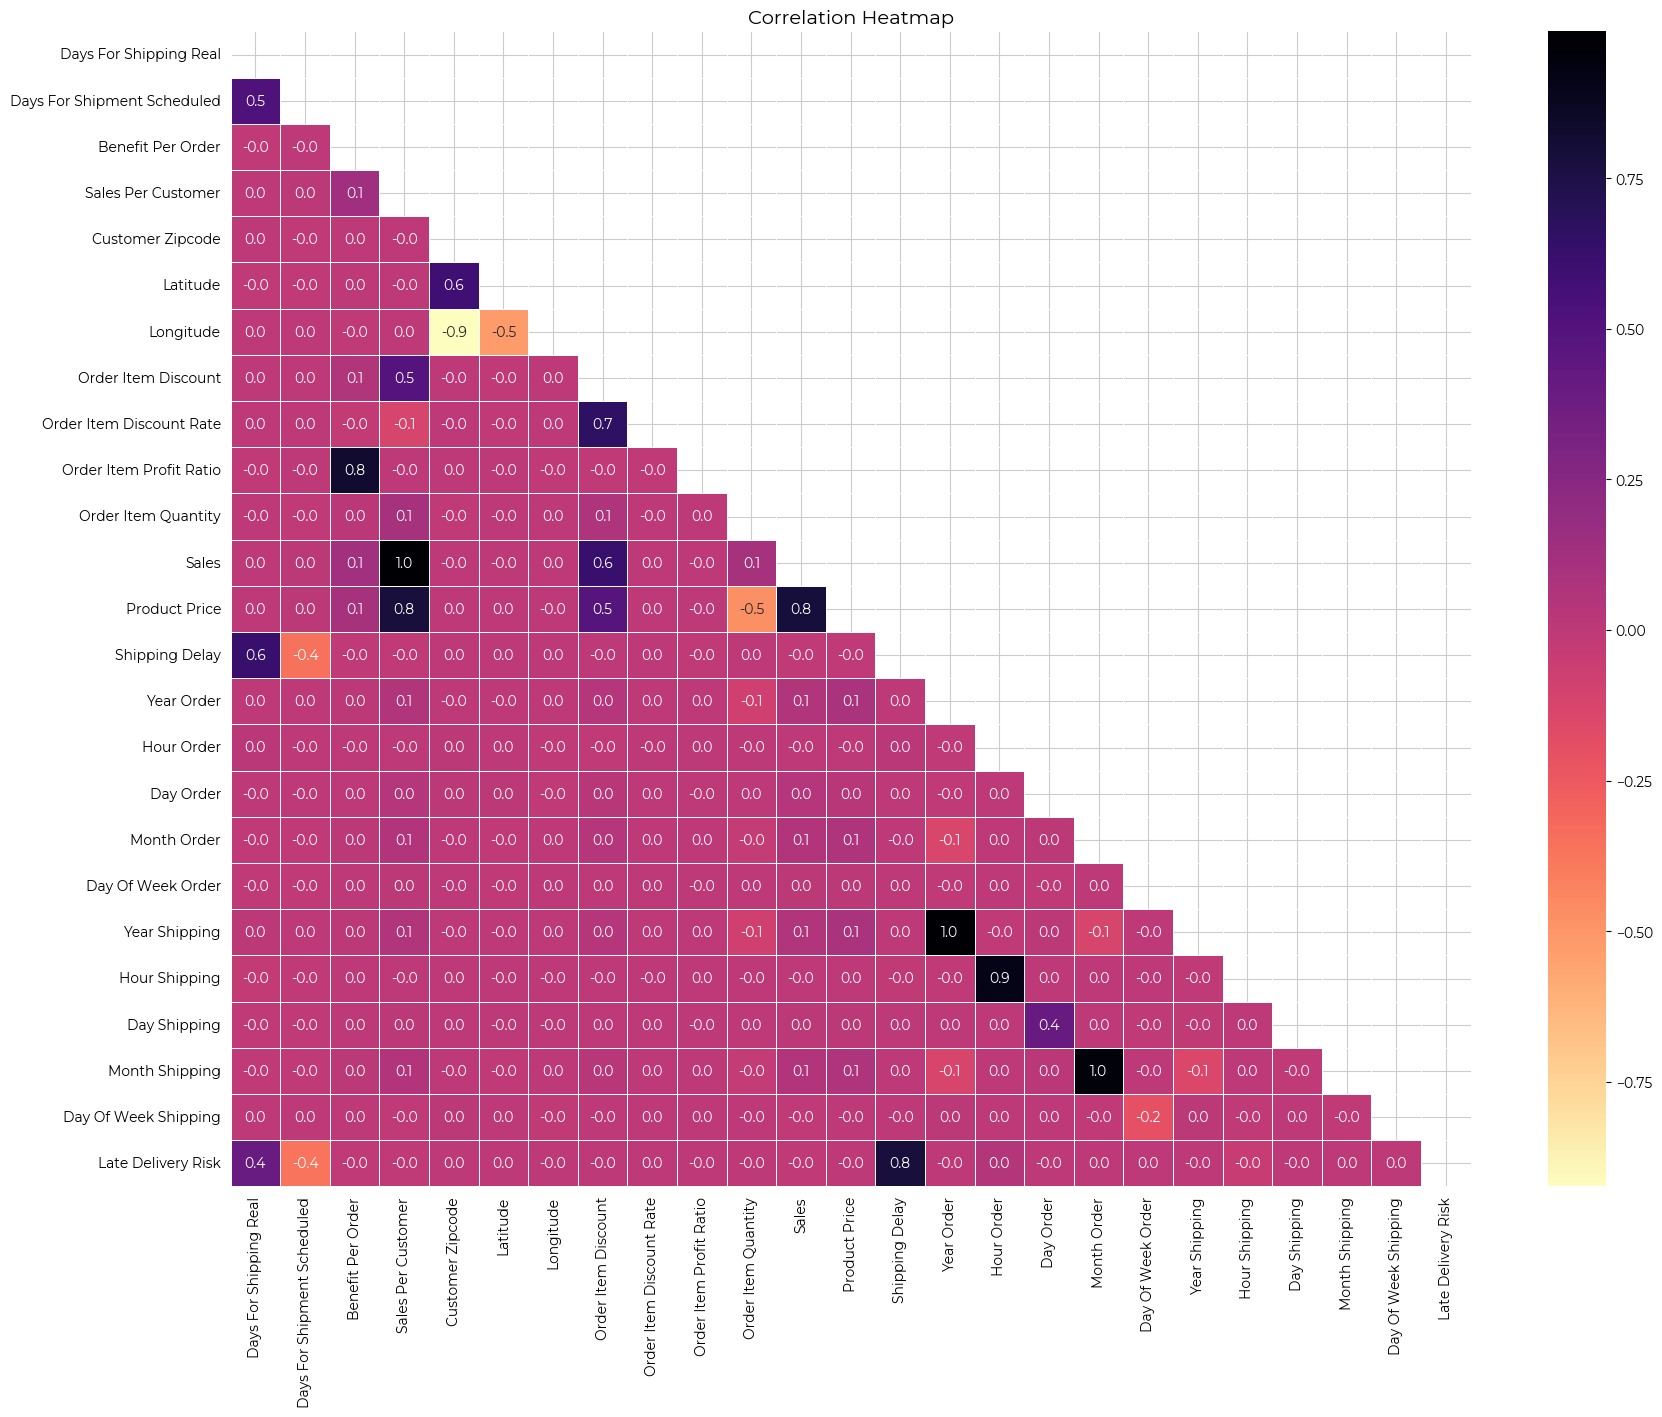

In [17]:
# Let's explore the correlation between the numerical features and the target variable (price)
correlation = vis.corr_heatmap(num)
correlation

### What did we observe and/or learn from the correlation matrix:

- There is a low correlation between most of the numerical variables and the target
- There is high correlation between a few features that need to be consider for models sensible to multicollinearity 

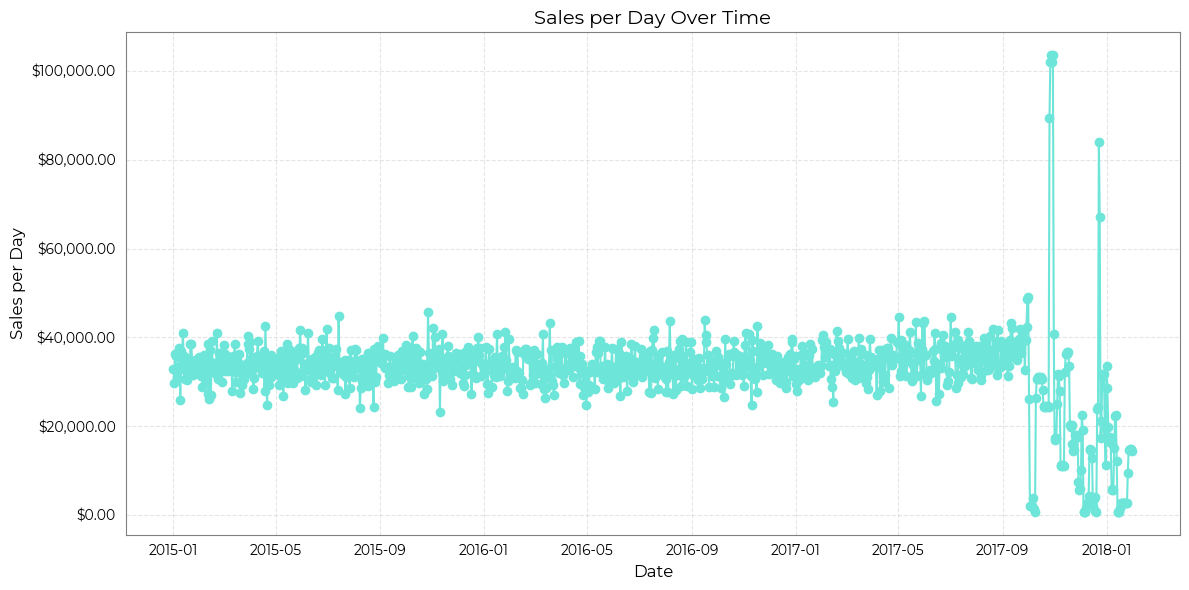

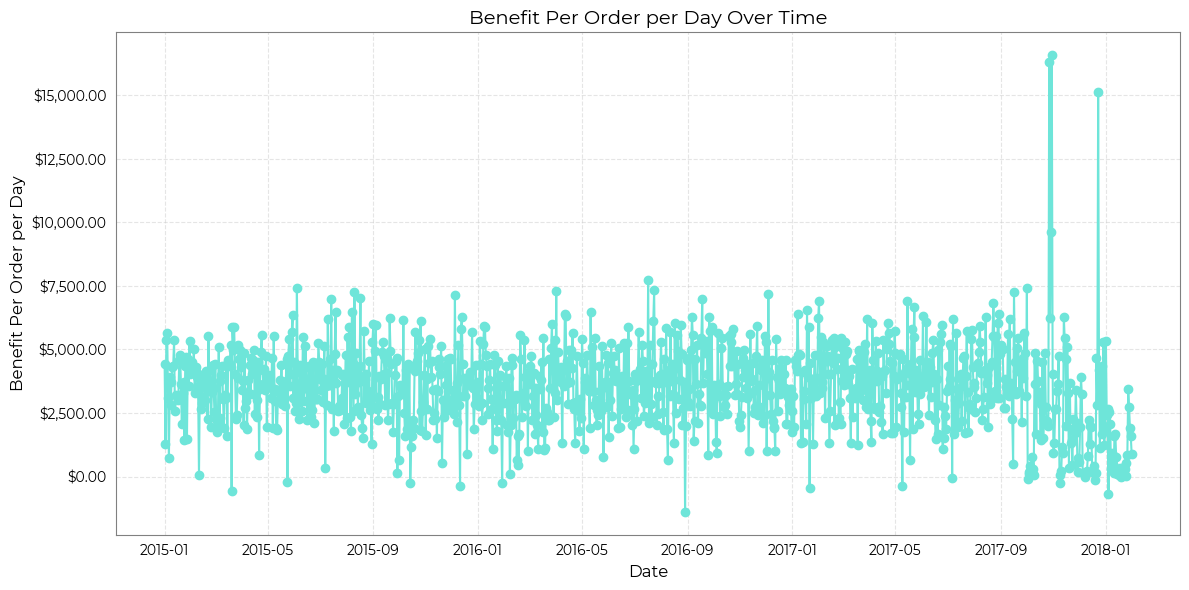

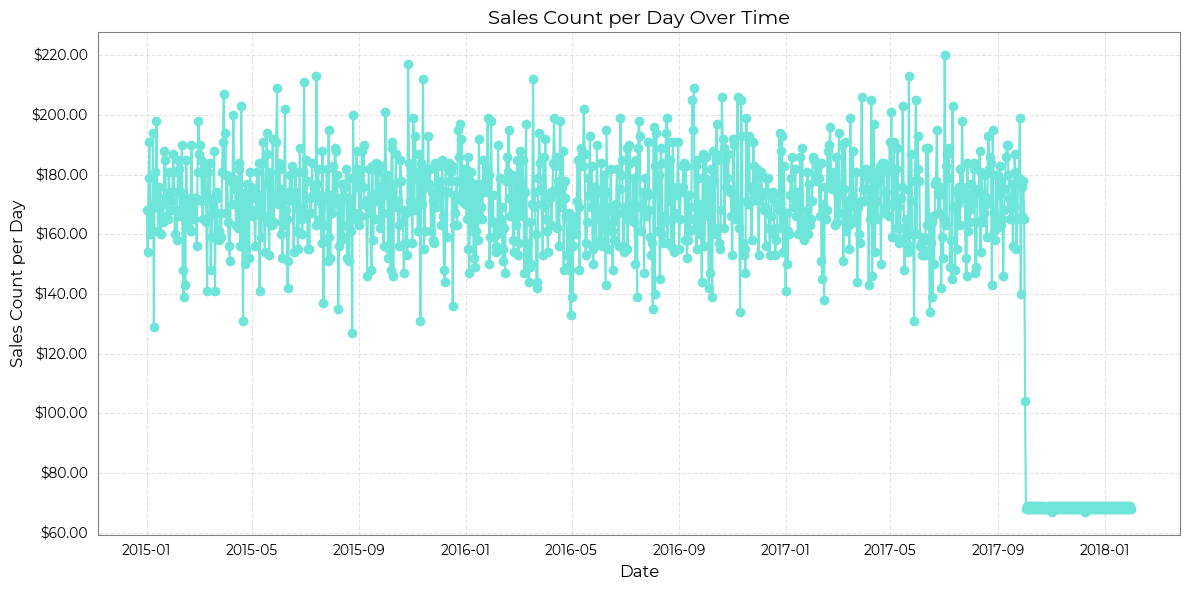

In [18]:
# Let's explore how some of the features change over time. Sales and benefit per day do not considering if an order was later cancel or not
vis.plot_feature_trends_per_day(num, 'sales')
vis.plot_feature_trends_per_day(num, 'benefit_per_order')
vis.plot_feature_trends_per_day(num)


### What did we observe and/or learn from the time analysis?:

- The `sales_per_day`, `sale_count` and `sales_profit_per_day` shows a stable trend over time, but during 2017 a deep drop is observed.
- There drop is between Sep and Oct 2017.
- The drop don't seems to be a seasonal trend since similar tends are not observed in the data time period.
- The related causes of this decrease mighty be an external factor from those in the dataframe, as a market crash and is out of the project scope, but can be further investigated in a more detailed EDA analysis.
- From this analysis also come the question if `sales_per_customer` (after discount) and `benefit_per_order` (or `profit_ratio`) can be used as target variable in ML regression models? (Out of the scope of this project) 

In [19]:
# Load the dataset with the ID to perform customer segmentation
num_with_id = pd.read_csv("../data/numerical_with_id.csv")

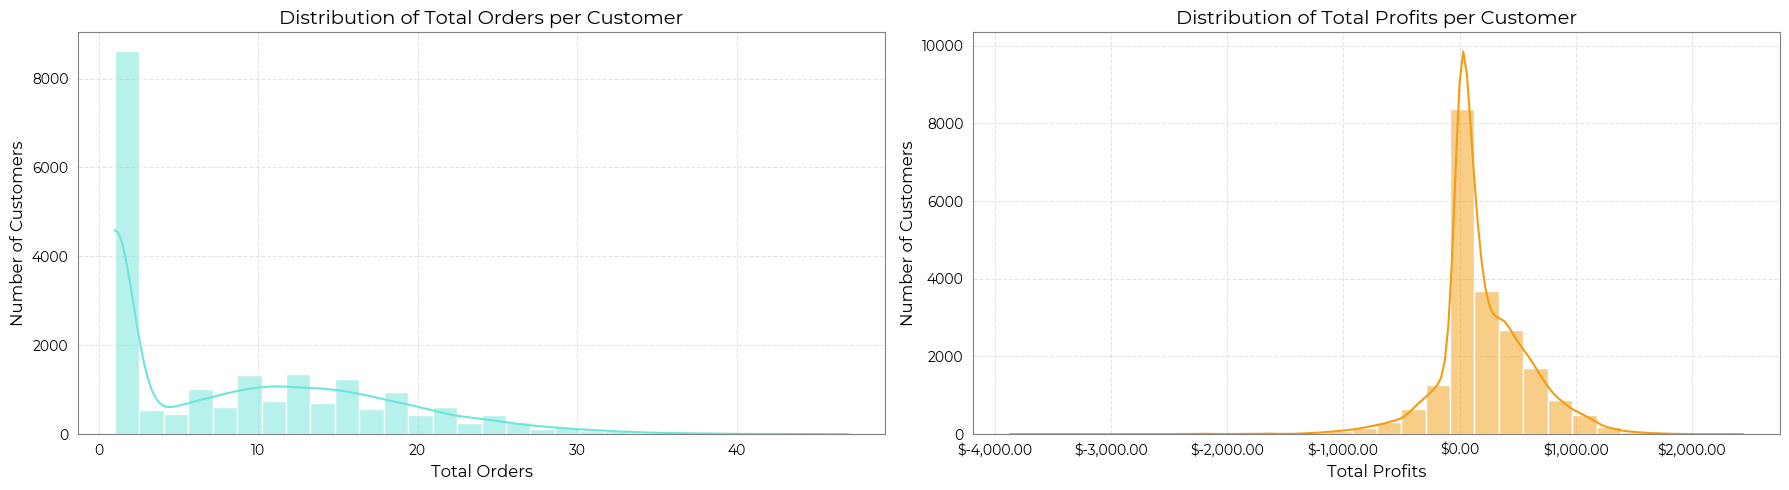

In [20]:
# Let's see how some features are distributed for each customer (cancel orders are not considered in the total profit analysis)
vis.plot_customer_metrics(num_with_id)

### What did we observe and/or learn from the customer segmentation?:

- Most customers have bought products only once, but some customers have bought products multiple times.
- Based on this results might be possible to create customer segmentation using Unsupervised ML models to identify different customer groups. (Out of the scope of this project)
- Most clients have a low cumulative profit, but some customers have a high cumulative profit. 
- This can be used to identify high-value customers and create targeted marketing campaigns to retain them.  

## Categorical data

In [21]:
# Load dataset pre-cleaned for the database processing
path = "../data/categorical.csv"
cat = pd.read_csv(path)

In [22]:
# Check the first rows of the data
cat.head()

,type,delivery_status,category_name,customer_city,customer_country,customer_segment,customer_state,department_name,market,order_city,order_country,order_region,order_state,order_status,product_name,shipping_mode
0,CASH,Advance shipping,Camping & Hiking,Hickory,EE. UU.,Consumer,NC,Fan Shop,LATAM,Mexico City,México,Central America,Distrito Federal,CLOSED,Diamondback Women's Serene Classic Comfort Bi,Standard Class
1,PAYMENT,Advance shipping,Men's Footwear,Chicago,EE. UU.,Consumer,IL,Apparel,LATAM,Dos Quebradas,Colombia,South America,Risaralda,PENDING_PAYMENT,Nike Men's CJ Elite 2 TD Football Cleat,Standard Class
2,PAYMENT,Advance shipping,Water Sports,Chicago,EE. UU.,Consumer,IL,Fan Shop,LATAM,Dos Quebradas,Colombia,South America,Risaralda,PENDING_PAYMENT,Pelican Sunstream 100 Kayak,Standard Class
3,PAYMENT,Advance shipping,Women's Apparel,Chicago,EE. UU.,Consumer,IL,Golf,LATAM,Dos Quebradas,Colombia,South America,Risaralda,PENDING_PAYMENT,Nike Men's Dri-FIT Victory Golf Polo,Standard Class
4,CASH,Late delivery,Accessories,San Antonio,EE. UU.,Home Office,TX,Outdoors,LATAM,Dos Quebradas,Colombia,South America,Risaralda,CLOSED,Team Golf New England Patriots Putter Grip,Standard Class


### Features frequency analysis 

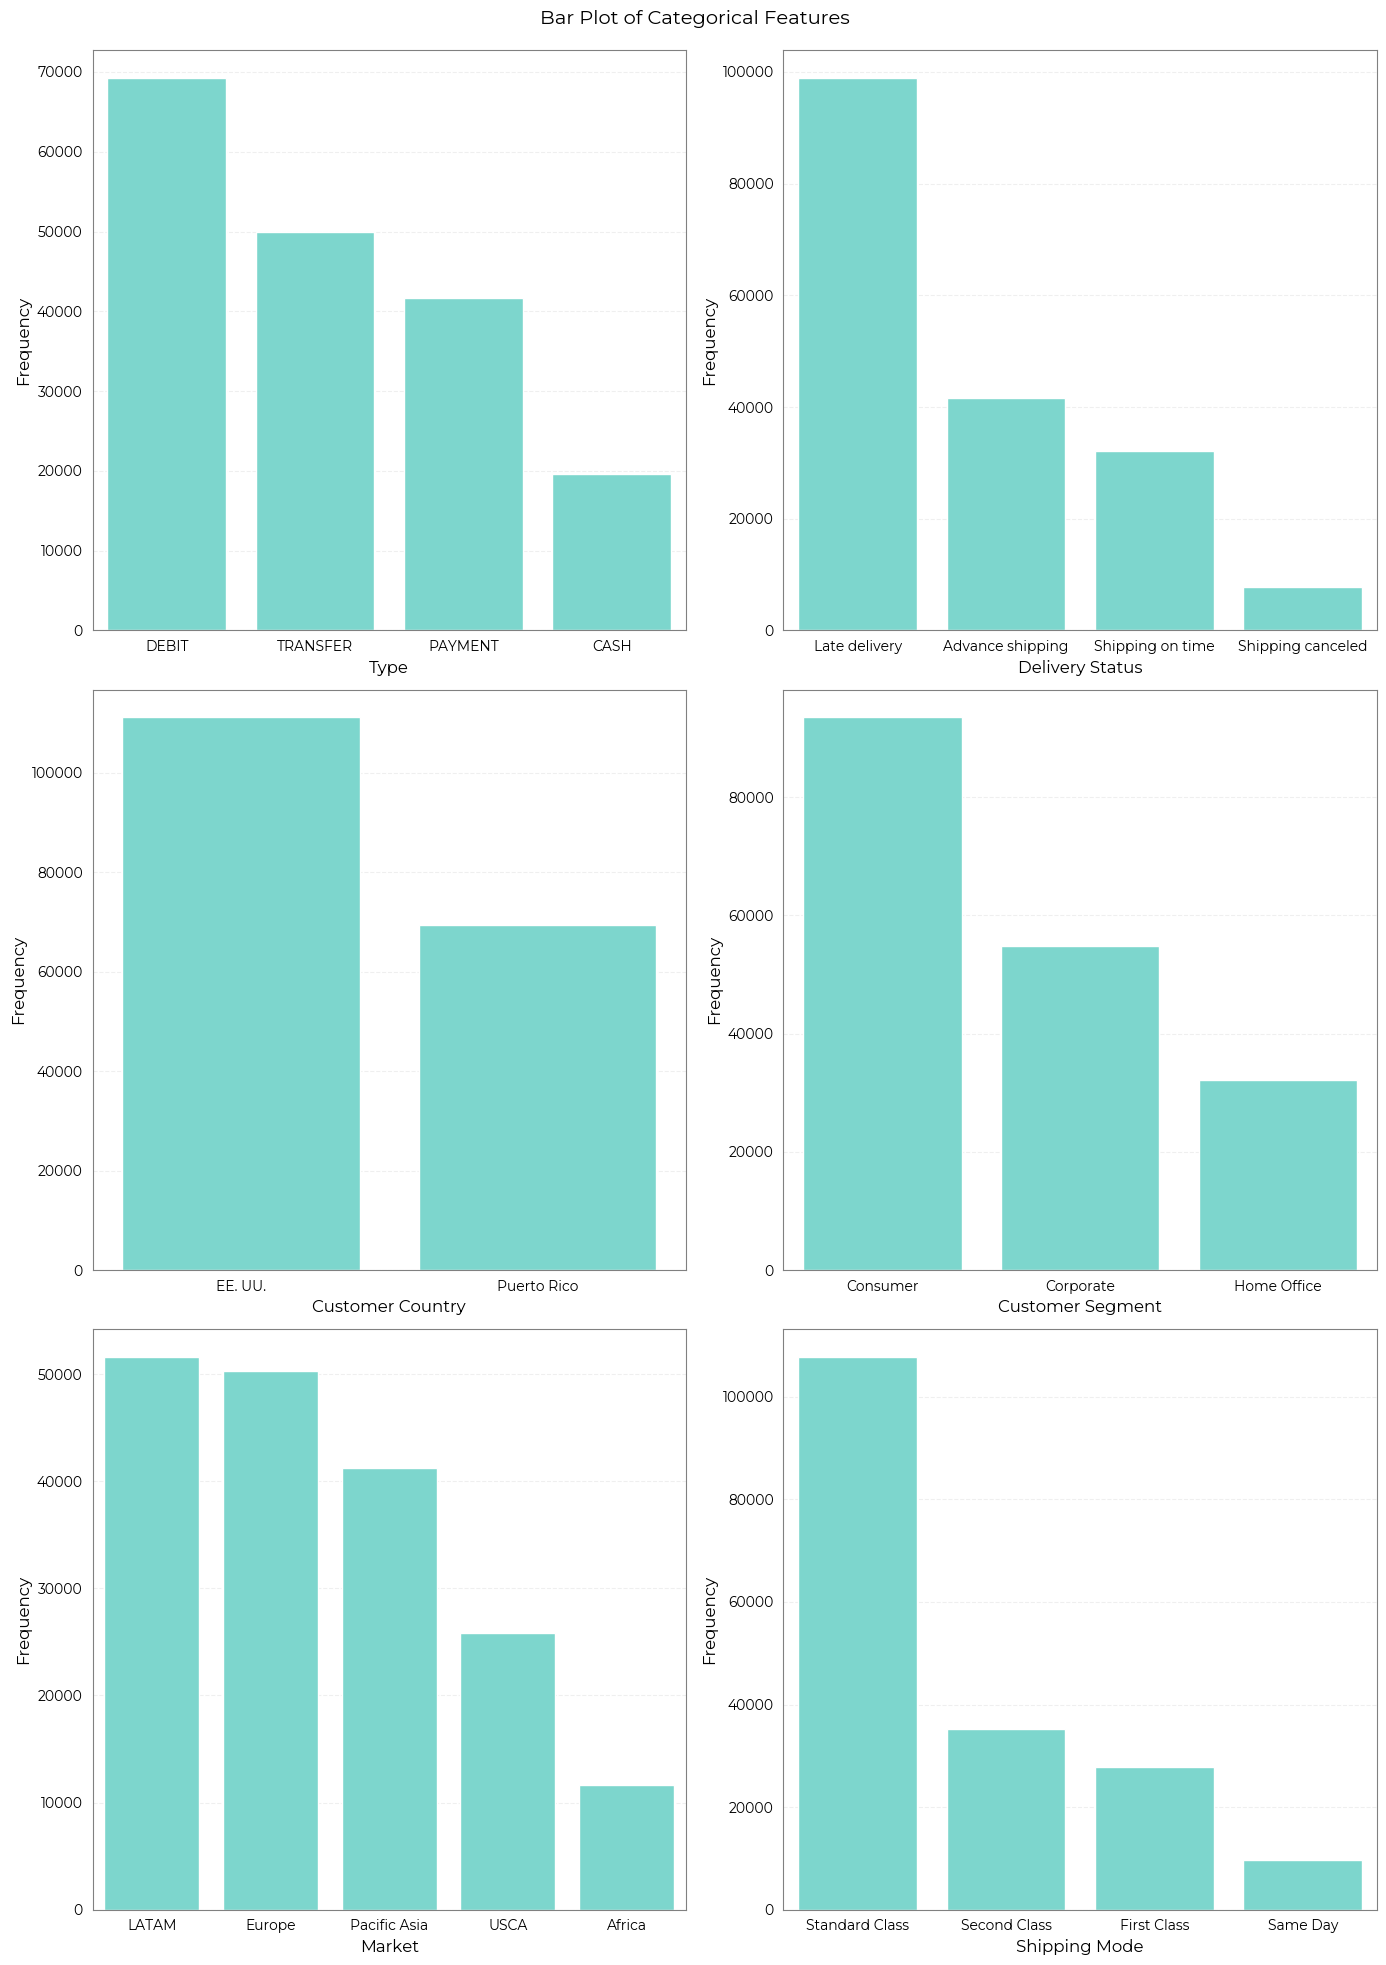

In [23]:
# Bar plots for categorical features
vis.bar_plot(cat[['type', 'delivery_status', 'customer_country', 'customer_segment', 'market', 'shipping_mode']])

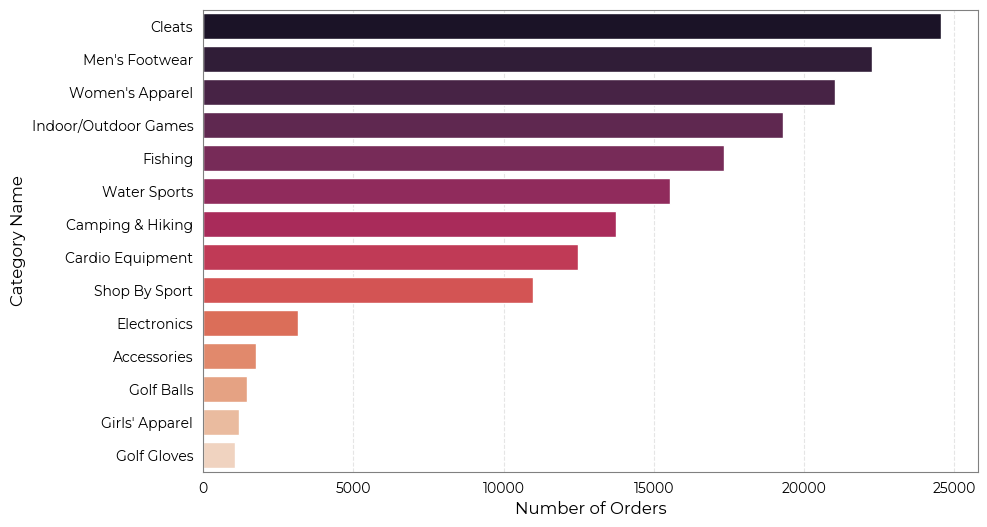

In [24]:
# Number of orders by top 14 categories
vis.plot_large_categorical(cat, 'category_name')

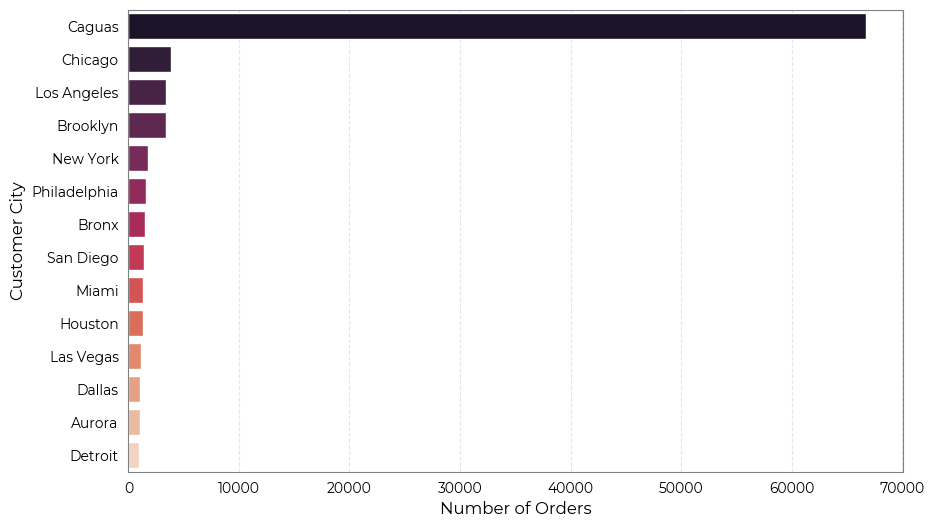

In [25]:
# Number of orders by top 14 customers cities
vis.plot_large_categorical(cat, 'customer_city')

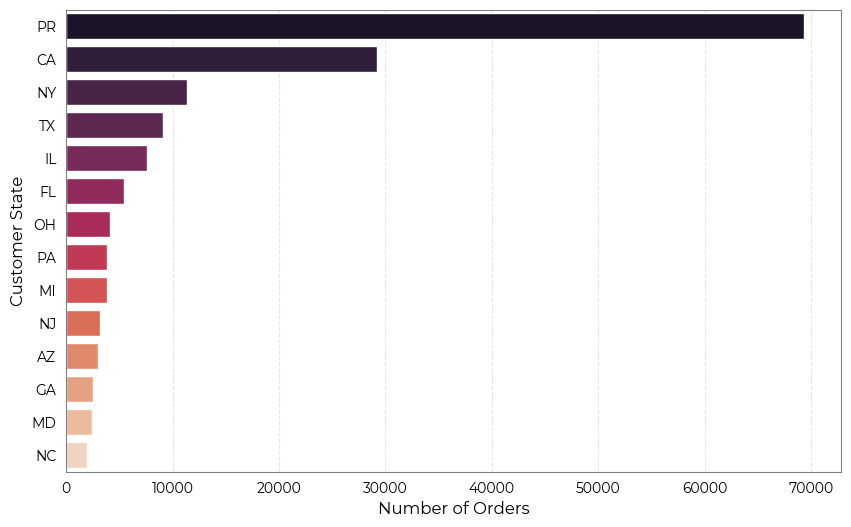

In [26]:
# Number of orders by top 14 states
vis.plot_large_categorical(cat, 'customer_state')

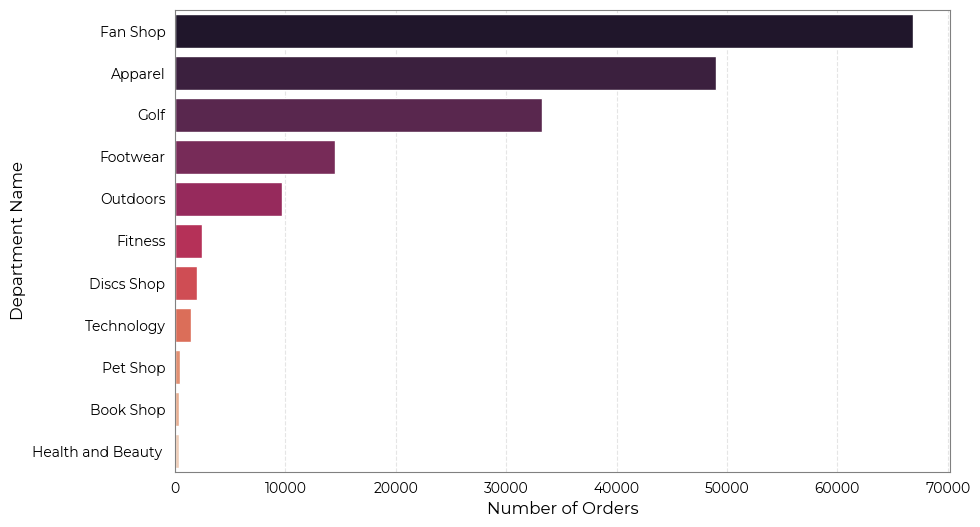

In [27]:
# Number of orders by top 14 departments
vis.plot_large_categorical(cat, 'department_name')

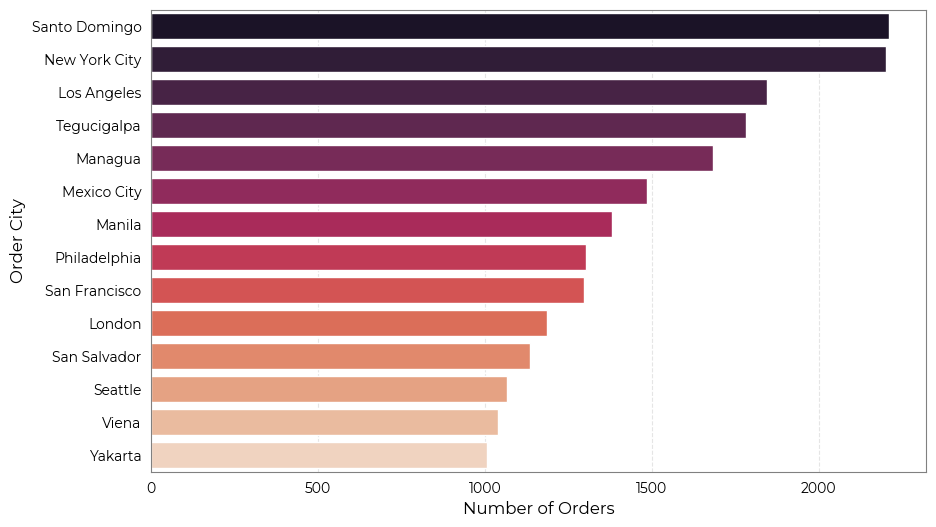

In [28]:
# Number of orders by top 14 cities delivering the orders
vis.plot_large_categorical(cat, 'order_city')

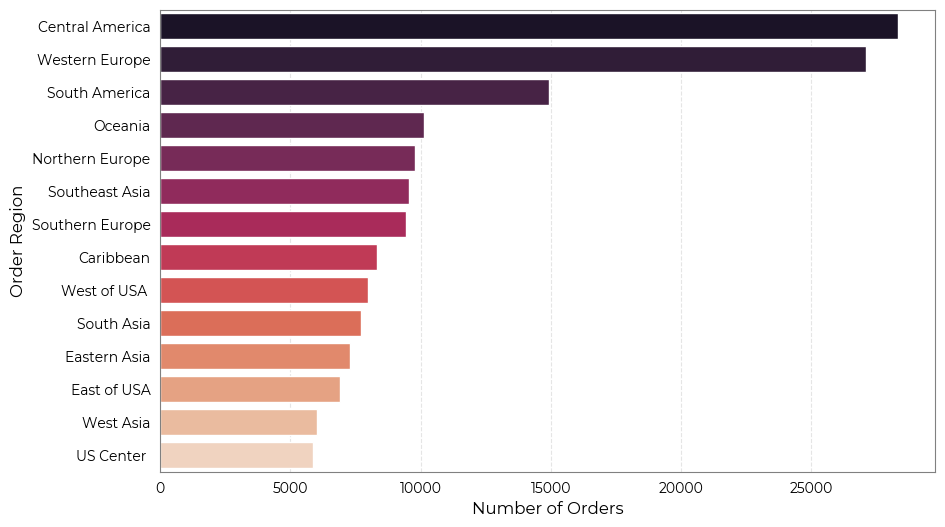

In [29]:
# Number of orders by top 14 regions delivering the orders
vis.plot_large_categorical(cat, 'order_region')

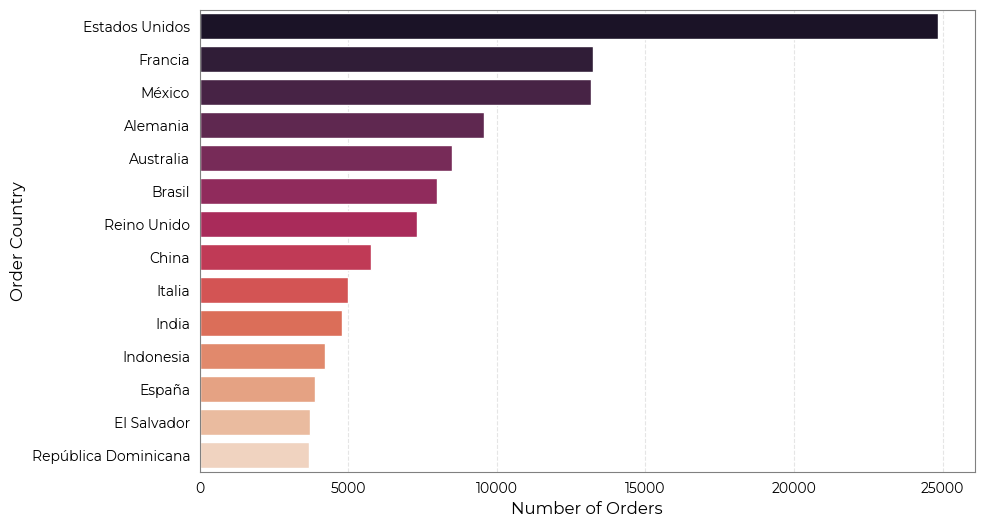

In [30]:
# Number of orders by top 14 countries delivering the orders
vis.plot_large_categorical(cat, 'order_country')

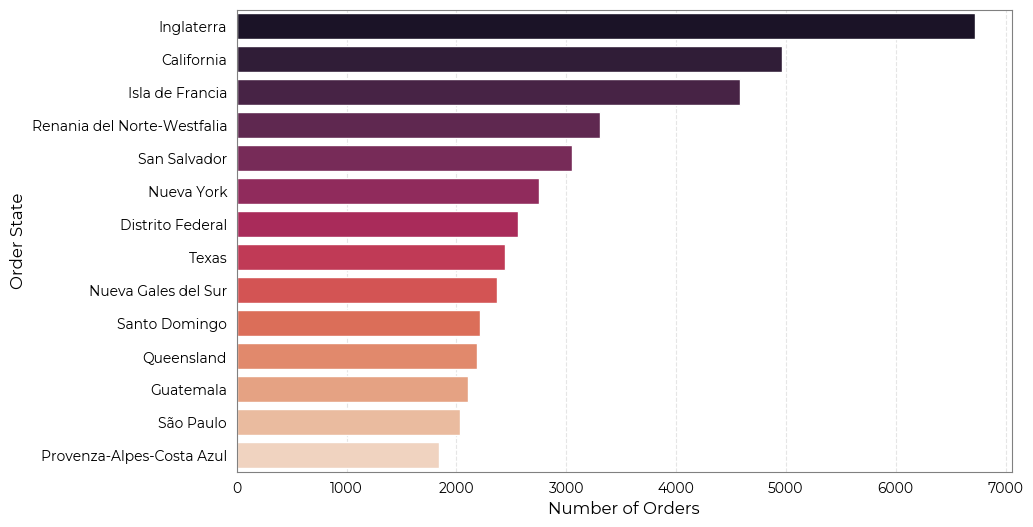

In [31]:
# Number of orders by top 14 state delivering the orders
vis.plot_large_categorical(cat, 'order_state')

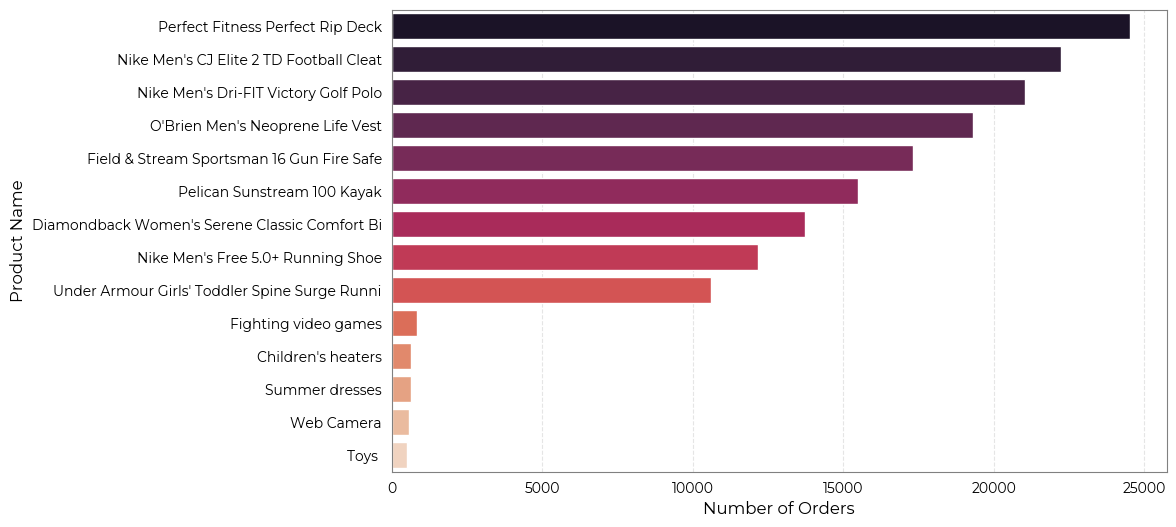

In [32]:
# Number of orders by top 14 products
vis.plot_large_categorical(cat, 'product_name')

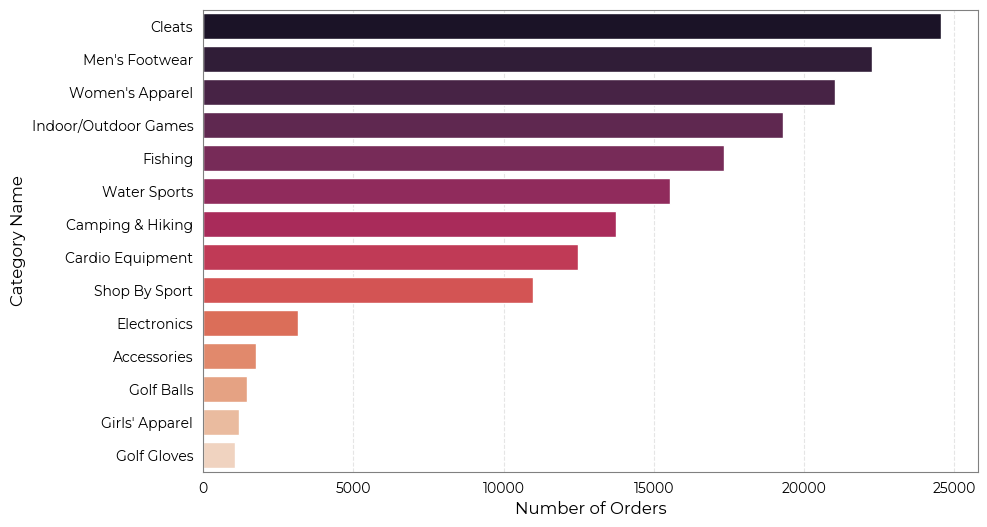

In [33]:
# Number of orders by top 14 categories
vis.plot_large_categorical(cat, 'category_name')

### Bivariate Analysis

In [34]:
# Merging the data frames
num_late = num[['late_delivery_risk', 'benefit_per_order']]
data = pd.concat([num_late, cat], axis=1)

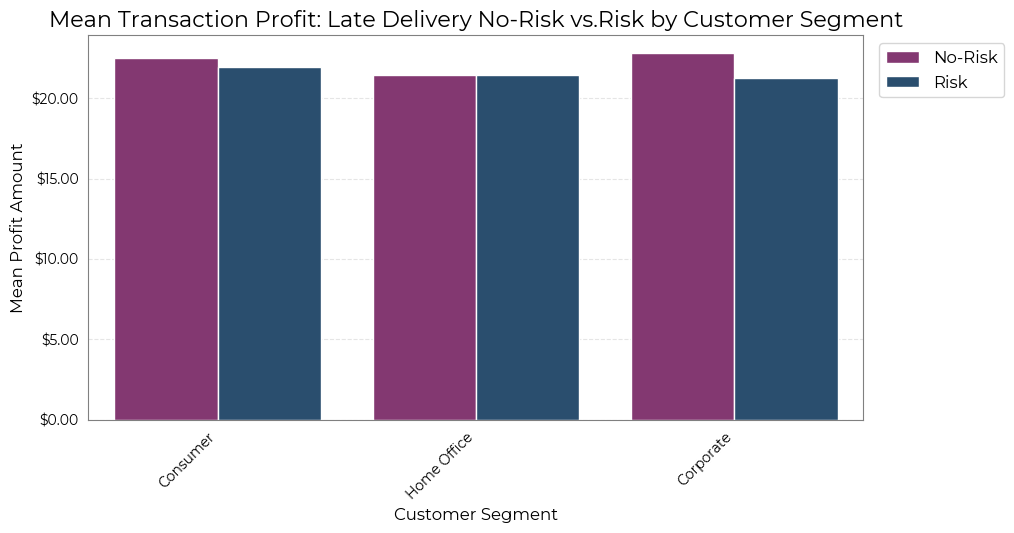

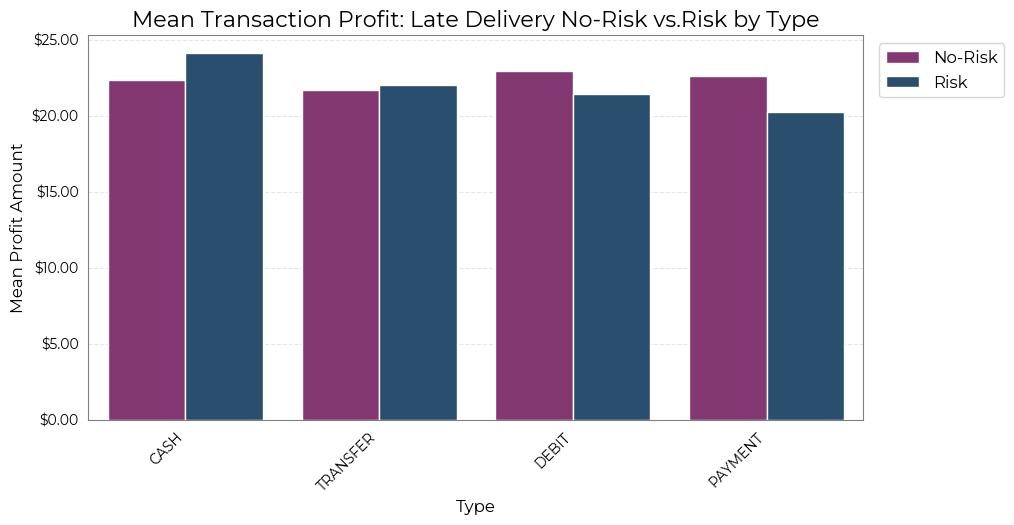

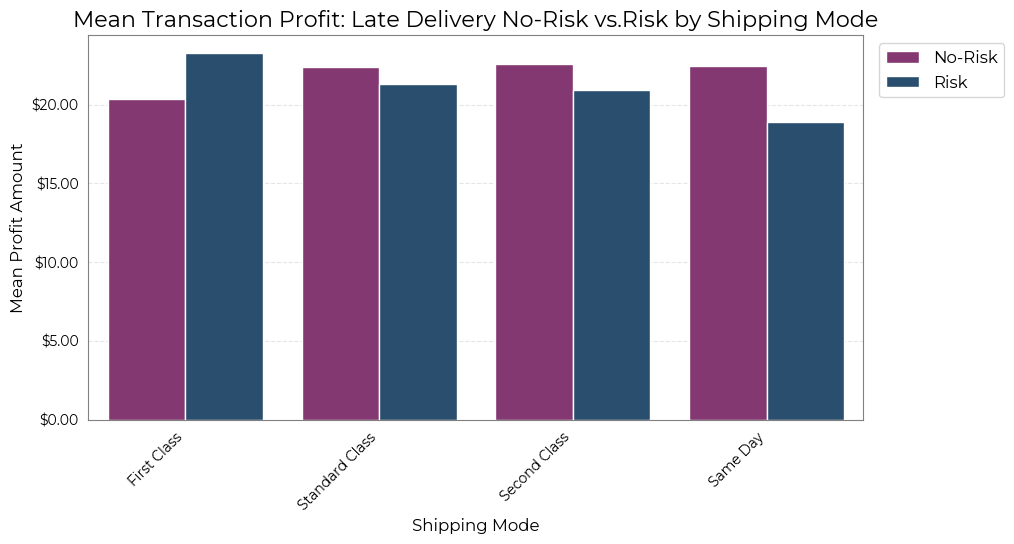

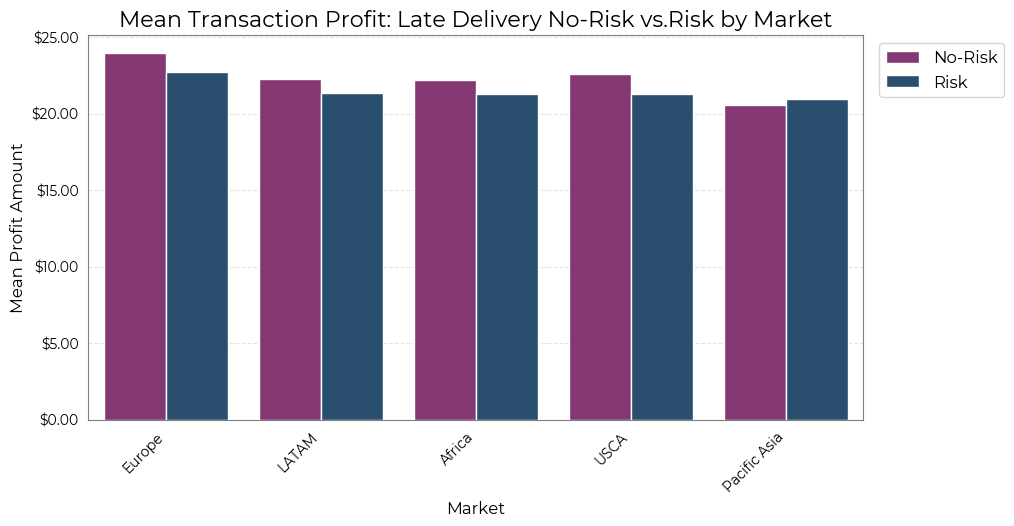

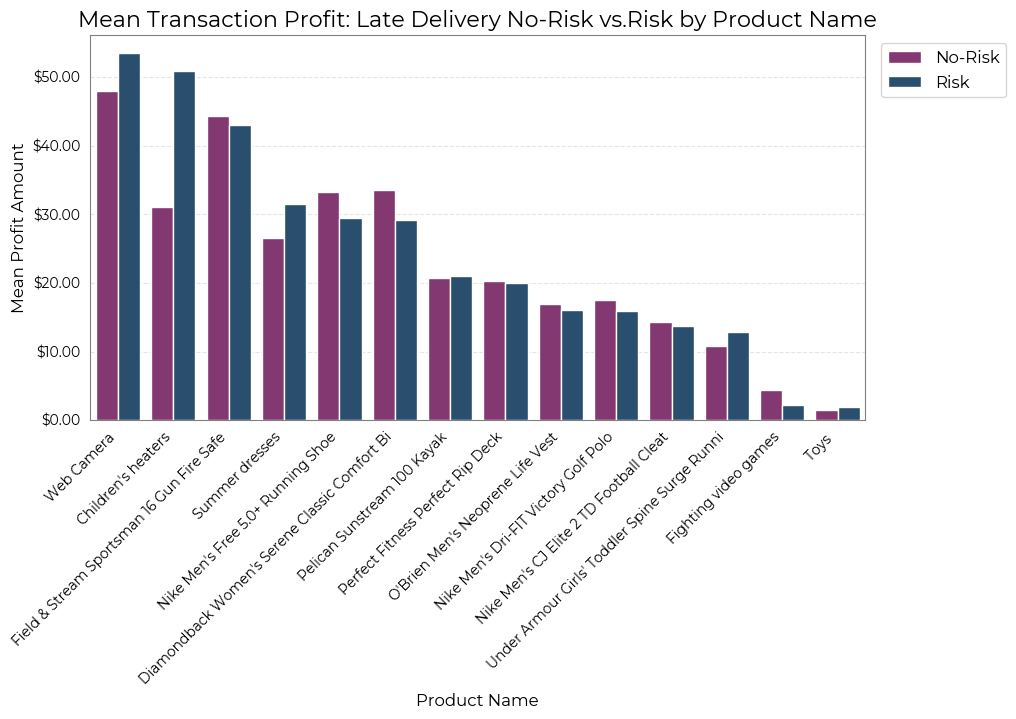

In [35]:
# Mean profit
vis.plot_late_vs_nonlate_means(data, 'customer_segment')
vis.plot_late_vs_nonlate_means(data, 'type')
vis.plot_late_vs_nonlate_means(data, 'shipping_mode')
vis.plot_late_vs_nonlate_means(data, 'market')
vis.plot_late_vs_nonlate_means(data, 'product_name')

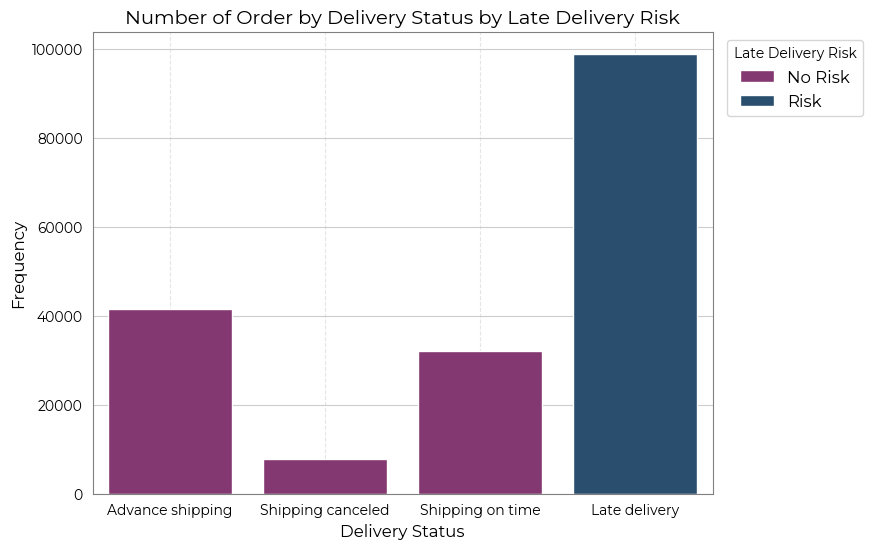

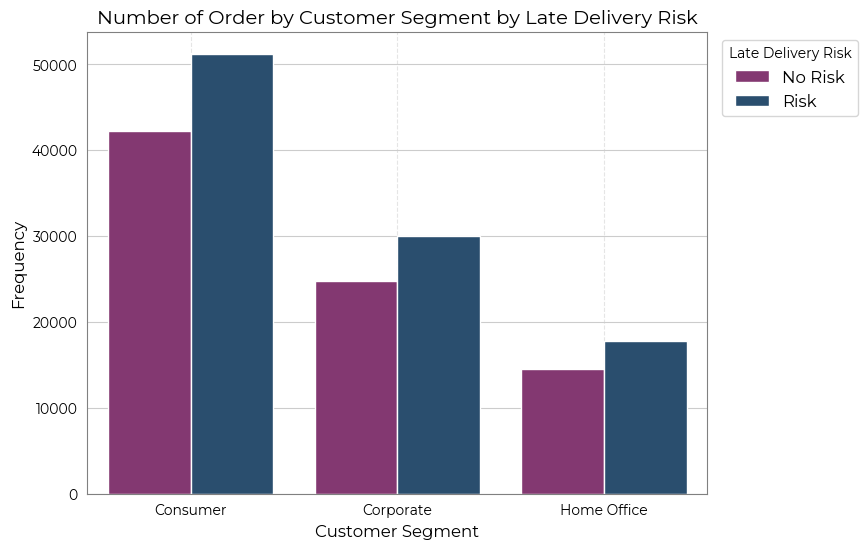

In [36]:
# Frequency by late_delivery_risk
vis.plot_feature_by_late_risk(data, 'delivery_status') 
vis.plot_feature_by_late_risk(data, 'customer_segment') 

### What did we observe and/or learn from the categorical variables:

- Customer segmentation variates between orders with a without late delivery risk.
- Profits by features variates between orders with a without late delivery risk.
- Perfect Fitness Perfect Rip deck is the most bought product, cleat shoes is the most bought category and web cameras are the most profitable category 
- A deep EDA is not part of the scope of this project but the dataset offer many features that allow for a more comprehensive study of customers behavior

<span style="color:red;">After finishing this notebook I recommend to check the `models` folder were the different Classification models are trained</span>